In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load csv
csv = "emails.csv"  # Update with your file's path
emails_df = pd.read_csv(csv)

# Display the first few rows
emails_df.head()


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [ ]:
# Extract email domains and count occurrences
emails_df['domain'] = emails_df['Email'].str.split('@').str[1] 
domain_counts = emails_df['domain'].value_counts()


domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

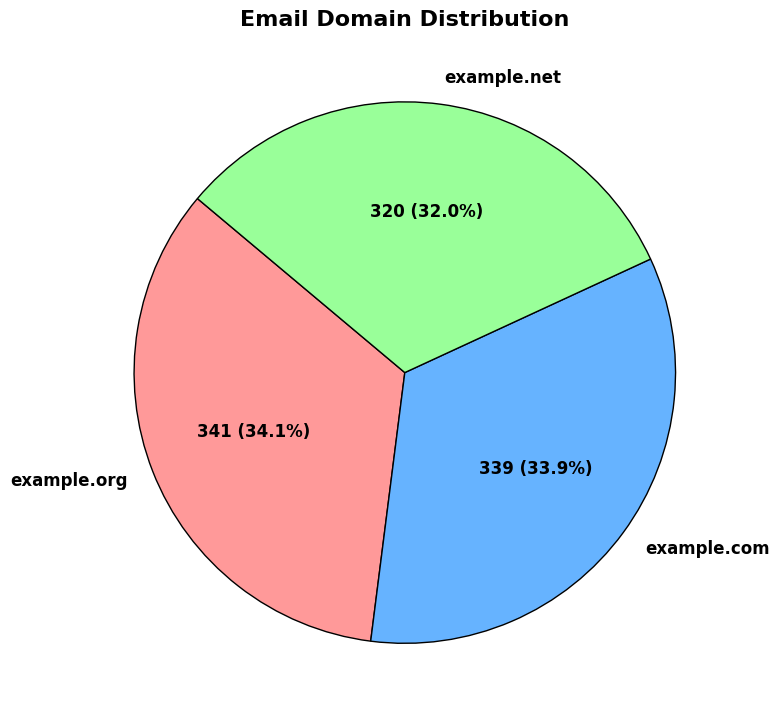

In [ ]:
# Define a color palette
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Define a custom autopct function to include domain names and percentages
def autopct_with_labels(pct, all_values):
    total = sum(all_values)
    value = int(round(pct * total / 100.0))
    return f'{value} ({pct:.1f}%)'

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
wedges, texts, autotexts = plt.pie(
    domain_counts, 
    labels=domain_counts.index, 
    autopct=lambda pct: autopct_with_labels(pct, domain_counts), 
    startangle=140, 
    colors=colors,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}, 
    textprops={'fontsize': 12}  
)

# Make the domain names bold
for text in texts:
    text.set_fontweight('bold')

# Style the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Add a title
plt.title("Email Domain Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
